In [43]:
import nltk
import keras
import os
from multiprocessing import pool
from tqdm import tqdm # for visualising loops
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Dropout, Dense,SpatialDropout1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
import re
from nltk.corpus import stopwords
%matplotlib inline

In [30]:
#just copy the regex code somewhere from the internet
#follow this url guys to get link to the 
#http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
from nltk.stem.wordnet import WordNetLemmatizer #this is more powerful then stemming cause it has a database lookup
lemma = WordNetLemmatizer()
def remSym(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text) #removing numbers and puncuations
    text = re.sub(r'\s+', ' ', text)#removing spaces
    return text
def remStop(text):
    stop = stopwords.words("english") 
    filtext = [word for word in text.split() if word not in stop]
    return ' '.join(filtext)
def lemmatizer(text):
    result= []
    text = text.split()
    for word in tqdm(text):
        result.append(lemma.lemmatize(word))
    return ' '.join(result)
def preprocessText(data):
    data['text'] = data['text'].apply(lambda x : remSym(x))
    data['text'] = data['text'].apply(lambda x : remStop(x))
    data['text'] = data['text'].apply(lambda x : lemmatizer(x))
    return data

In [14]:
import warnings
warnings.filterwarnings("ignore")
root = "C:\\Users\\Asus\\Desktop\\Machine learning,Deep Learning\\aclImdb\\test\\"
train_pos ="C:\\Users\\Asus\\Desktop\\Machine learning,Deep Learning\\aclImdb\\test\\pos"
train_neg ="C:\\Users\\Asus\\Desktop\\Machine learning,Deep Learning\\aclImdb\\test\\neg"
pos_files = os.listdir(train_pos)
neg_files = os.listdir(train_neg)
#creating tuples
data = []
for var in ["pos","neg"]:
    if(var=="pos"):
        for files in pos_files:
            with open(root+var+"\\" + files,encoding='utf-8') as f: #always encode utf-8 cause it has symbols above ascii  range
                data.append((f.read(),var))
    else:
        for files in neg_files:
            with open(root+var+"\\" + files,encoding='utf-8') as f:
                data.append((f.read(),var))

In [15]:
import pandas as pd
data = pd.DataFrame(data,columns=['text','sentiment'])
data = data.sample(frac=1).reset_index(drop = True)
data['encoded'] = data['sentiment'].apply(lambda x : 1 if x=="pos" else 0)

In [17]:
data.head(10)

text sentiment  encoded
0  This show has everything you could ever want f...       pos        1
1  ** and 1/2 stars out of **** Lifeforce is one ...       pos        1
2  As a Canadian, I didn't know very much about t...       pos        1
3  This is a very famous Ninja movie but it isn't...       neg        0
4  1st watched 1/1/2003 - 3 out of 10(Dir-Henri V...       neg        0
5  The Russian space station 'Avna' with a crew o...       neg        0
6  It amazes me that anyone would find Pauly Shor...       neg        0
7  This is one of the most outstanding horror mov...       pos        1
8  The filmmakers apparently had enough money to ...       neg        0
9  I have fond memories of watching this visually...       pos        1

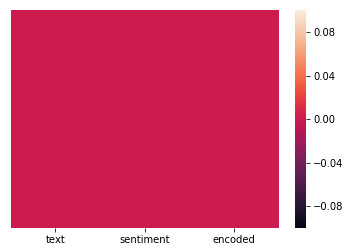

In [19]:
#for some visualisations:
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False)
#some luck cause there is not

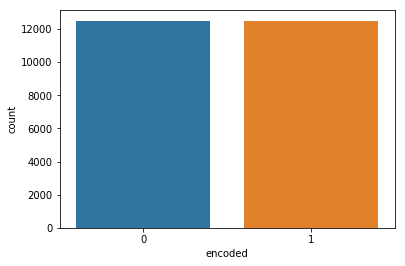

In [20]:
#checking for oversampling and undersampling 
sns.countplot(data['encoded'],)
data.drop(['sentiment'],axis=1,inplace=True)

In [31]:
data = preprocessText(data)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 68/68 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 123/123 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 256/256 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 173/173 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 143/143 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 228/228 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 56/56 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 118/118 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 140/140 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 28539.49it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 71/71 [00:00<00:00, 17770.35it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 156/156 [00:00<00:00, 39049.38it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 73/73 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 305/305 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 69/69 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 82/82 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 187/187 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 46/46 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 236/236 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 135/135 [00:00<00:00, 33736.36it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 211/211 [00:00<00:00, 52905.20it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 63/63 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 58/58 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 201/201 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████| 452/452 [00:00<00:00, 114199.47it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 242/242 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 192/192 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 123/123 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 75/75 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 279/279 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 57/57 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 310/310 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 235/235 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 166/166 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 333/333 [00:00<00:00, 83246.11it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 107/107 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 75/75 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 54/54 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 54/54 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 137/137 [00:00<00:00, 34297.46it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 63/63 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 260/260 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 288/288 [00:00<00:00, 72108.38it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 60427.26it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 137/137 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 56/56 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 166/166 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 251/251 [00:00<00:00, 62836.95it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 155/155 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 148/148 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 19778.55it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 272/272 [00:00<00:00, 68090.16it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 121/121 [00:00<00:00, 30291.92it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 189/189 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 151/151 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 67/67 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 89/89 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 284/284 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 167/167 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 232/232 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 225/225 [00:00<00:00, 56364.95it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 101/101 [00:00<00:00, 25284.99it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 54/54 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 121/121 [00:00<00:00, 30286.49it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 74/74 [00:00<00:00, 18525.64it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 64/64 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 57/57 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 42110.98it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 75/75 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 50560.92it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 5250.69it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 73/73 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 92/92 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 175/175 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 88/88 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 238/238 [00:00<00:00, 59593.12it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 85/85 [00:00<00:00, 21285.80it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 83/83 [00:00<00:00, 20776.27it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 68/68 [00:00<00:00, 17031.69it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 98/98 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 161/161 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 69/69 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 131/131 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 83/83 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 76/76 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 64/64 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 89/89 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 104/104 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 193/193 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 361/361 [00:00<00:00, 90369.67it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 44/44 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 239/239 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 82/82 [00:00<00:00, 20524.73it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 66/66 [00:00<00:00, 16524.84it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 181/181 [00:00<00:00, 45234.41it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 122/122 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 143/143 [00:00<00:00, 35790.99it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 326/326 [00:00<00:00, 81389.47it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 120/120 [00:00<00:00, 30016.49it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 148/148 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 123/123 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 148/148 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 166/166 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 58/58 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 409/409 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 72/72 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 55/55 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 409/409 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 221/221 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 229/229 [00:00<00:00, 57325.91it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 173/173 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 67/67 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 52/52 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 37/37 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 85/85 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 210/210 [00:00<00:00, 52594.72it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 148/148 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 68/68 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 261/261 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 83/83 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 28038.80it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 76/76 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 137/137 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 85/85 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 315/315 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 76/76 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 149/149 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 58/58 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 86/86 [00:00<00:00, 21531.08it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 62/62 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 127/127 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 176/176 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 168/168 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 78/78 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 87/87 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 130/130 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 120/120 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 93/93 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 91/91 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 91/91 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 129/129 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 75/75 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 285/285 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 88/88 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 62/62 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 64/64 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 61/61 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 133/133 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 84121.42it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 152/152 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 64/64 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<00:00, 14773.08it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 61/61 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 190/190 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 64/64 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 68/68 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 83/83 [00:00<00:00, 20772.55it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 225/225 [00:00<00:00, 55732.50it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 83/83 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 85/85 [00:00<00:00, 21278.18it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 57/57 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 77/77 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 182/182 [00:00<00:00, 45642.05it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 138/138 [00:00<00:00, 34543.68it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 25550.59it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 199/199 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 48/48 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 141/141 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 124/124 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 113/113 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 93/93 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 64/64 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 410/410 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 194/194 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 118/118 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 83/83 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 97/97 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 54/54 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 61/61 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 303/303 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 93/93 [00:00<00:00, 23286.39it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 78/78 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<00:00, 12261.85it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 71/71 [00:00<00:00, 17776.72it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 64/64 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 45/45 [00:00<00:00, 11228.73it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 72/72 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 234/234 [00:00<00:00, 58584.56it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 245/245 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 61/61 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 298/298 [00:00<00:00, 74536.50it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 64/64 [00:00<00:00, 16018.35it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 95/95 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 23528.35it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 67/67 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 61/61 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 124/124 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 28037.13it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 54/54 [00:00<00:00, 13517.09it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 62/62 [00:00<00:00, 15522.40it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 186/186 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 268/268 [00:00<00:00, 67092.84it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 242/242 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 82/82 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 44/44 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 249/249 [00:00<00:00, 62339.98it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 172/172 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 96/96 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 68/68 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 91/91 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 83/83 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 166/166 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 199/199 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 304/304 [00:00<00:00, 76219.05it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 69/69 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 392/392 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 95/95 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 88/88 [00:00<00:00, 22026.54it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 122/122 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 46/46 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 197/197 [00:00<00:00, 49324.13it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 58/58 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 254/254 [00:00<00:00, 63603.18it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 86/86 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 157/157 [00:00<00:00, 39302.04it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 55/55 [00:00<00:00, 13768.23it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 73/73 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 63/63 [00:00<00:00, 15773.71it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 56/56 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 199/199 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 62/62 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████| 437/437 [00:00<00:00, 109381.80it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 41/41 [00:00<00:00, 10263.59it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 103/103 [00:00<00:00, 25782.60it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 28042.15it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 62/62 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 63/63 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 103/103 [00:00<00:00, 25796.46it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 61/61 [00:00<00:00, 15272.96it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 22520.42it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 81/81 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 106/106 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 78/78 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 88/88 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 77/77 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 164/164 [00:00<00:00, 41059.26it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 139/139 [00:00<00:00, 34767.03it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 33/33 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 42804.13it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 33/33 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 50566.96it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 81/81 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 304/304 [00:00<00:00, 76105.31it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 73/73 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 92/92 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 54/54 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 248/248 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 83/83 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 78/78 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 14996.62it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 194/194 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 54/54 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 57/57 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 197/197 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 91/91 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 62/62 [00:00<00:00, 15539.10it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 66/66 [00:00<00:00, 16522.86it/s]


100%|████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 8761.60it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 92/92 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 60075.97it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 81/81 [00:00<00:00, 20303.51it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 69/69 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 83/83 [00:00<?, ?it/s]


In [40]:
#padding,tokenize the sentences:
#this is because text cant be directly used to fit into a deep learning model
#we need to encode then into integers this is embedding
#An embedding is a mapping of a discrete — categorical — variable to a vector of continuous numbers
#foll this link-- https://towardsdatascience.com/neural-network-embeddings-explained-4d028e6f0526
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, split=' ')
tokenizer.fit_on_texts(data['text'].values)#fits the tokenizer on the text data
X = tokenizer.texts_to_sequences(data['text'].values)# skip any word not fitted upon in the prev step
X = pad_sequences(X)# to pad all  sentences to the same length

In [68]:
#creating the deep learning model architecture
#Keras offers an Embedding layer that can be used for neural networks on text data
#link for word embedding - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
#The Embedding layer is defined as the first hidden layer of a network
from keras.layers import BatchNormalization,LSTM,Dropout,Flatten
model = Sequential()
model.add(Embedding(max_words, 250,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2,return_sequences = True))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(50,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(25,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 1106, 250)         2500000   
_________________________________________________________________
spatial_dropout1d_15 (Spatia (None, 1106, 250)         0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 1106, 100)         140400    
_________________________________________________________________
lstm_16 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_29 (Dense)             (None, 50)                5050      
_________________________________________________________________
batch_normalization_9 (Batch (None, 50)                200       
_________________________________________________________________
dense_30 (Dense)             (None, 25)                1275      
__________

In [84]:
#creating the deep learning model architecture
#Keras offers an Embedding layer that can be used for neural networks on text data
#link for word embedding - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
#The Embedding layer is defined as the first hidden layer of a network
from keras.layers import BatchNormalization,LSTM,Dropout,Flatten
ip_len = X.shape[1]
model = Sequential()
model.add(Embedding(input_dim = max_words,output_dim=250,input_length = ip_len))
model.add(SpatialDropout1D(0.6))
model.add(LSTM(120, dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
model.add(LSTM(120, dropout=0.2, recurrent_dropout=0.2)) #return sequces ==false if you dont want another LSTM layer
model.add(Dense(50,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(25,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [85]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 1106, 250)         2500000   
_________________________________________________________________
spatial_dropout1d_19 (Spatia (None, 1106, 250)         0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 1106, 120)         178080    
_________________________________________________________________
lstm_24 (LSTM)               (None, 120)               115680    
_________________________________________________________________
dense_41 (Dense)             (None, 50)                6050      
_________________________________________________________________
batch_normalization_13 (Batc (None, 50)                200       
_________________________________________________________________
dense_42 (Dense)             (None, 25)                1275      
__________

In [86]:
#Fitting on the RNN
from sklearn.model_selection import train_test_split
batch_size = 100
X_train, X_test, y_train, y_test = train_test_split(X, data['encoded'].values, test_size=0.33, random_state=42)
model.fit(X_train, y_train, epochs = 7, batch_size=batch_size, verbose = 2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/7


KeyboardInterrupt: 

In [ ]:
#generally word2vec is used for word embedding
#TNSE or pca for dimensionaly reduction and then visualization at lower dimensional space
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_pred,y)
sns.heatmap(mat,annot=True)

In [ ]:
#predict some values blah